# Finetuning

Fine-tuning is a process of further training a pre-existing model (like TimeGPT) on a specific task or dataset. This allows you to leverage the general language understanding capabilities of the pre-trained model and adapt it to your specific use case. 

In TimeGPT, you can use the `finetune_steps` argument to specify the number of additional training steps the model should undergo on your time series data. This helps in refining the model's understanding and prediction of your data patterns. 

In [ ]:
#| hide
from dotenv import load_dotenv

In [ ]:
#| hide
load_dotenv()

True

In [ ]:
import os

import pandas as pd
from nixtlats import TimeGPT

In [ ]:
timegpt = TimeGPT(token=os.environ['TIMEGPT_TOKEN'])

Here's an example of how to fine-tune TimeGPT:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv')
df.head()

,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
timegpt_fcst_finetune_df = timegpt.forecast(
    df=df, h=12, finetune_steps=10,
    time_col='timestamp', target_col='value',
)

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


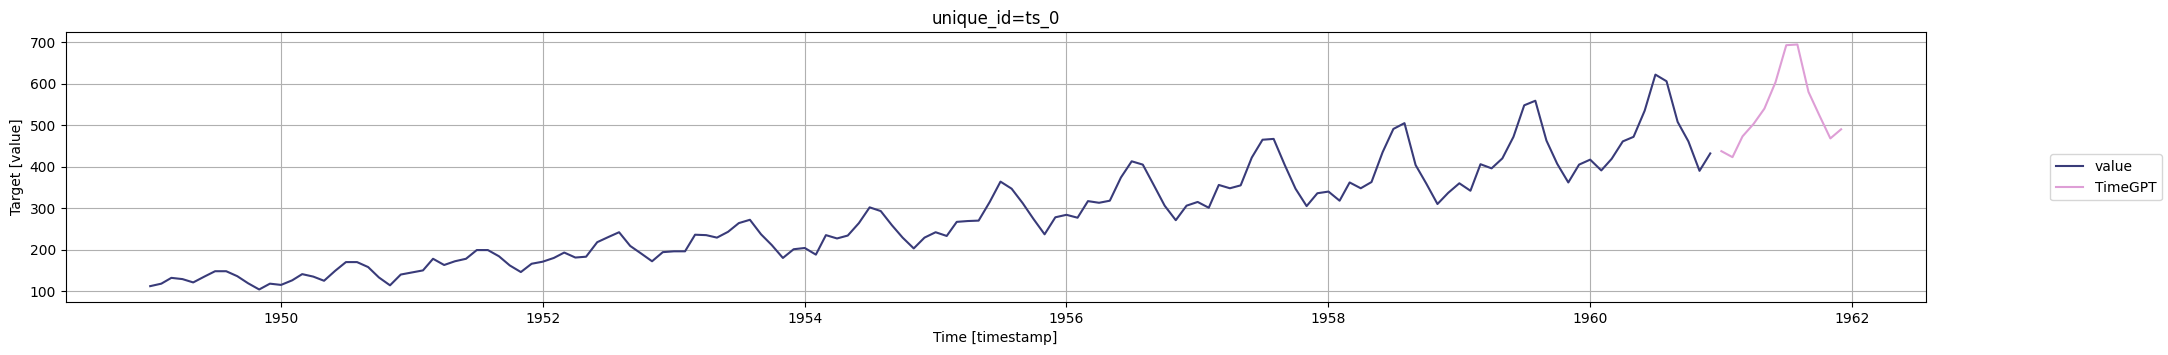

In [ ]:
timegpt.plot(
    df, timegpt_fcst_finetune_df, 
    time_col='timestamp', target_col='value',
)

In this code, `finetune_steps: 10` means the model will go through 10 iterations of training on your time series data.

Keep in mind that fine-tuning can be a bit of trial and error. You might need to adjust the number of `finetune_steps` based on your specific needs and the complexity of your data. It's recommended to monitor the model's performance during fine-tuning and adjust as needed. Be aware that more `finetune_steps` may lead to longer training times and could potentially lead to overfitting if not managed properly. 

Remember, fine-tuning is a powerful feature, but it should be used thoughtfully and carefully.